In [1]:
from pyspark import SparkContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
import math
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/Users/alvira/Desktop/distributedData/project/"

input_file_name1 = path+"review.json"
input_file_name2 = path+'business.json'
input_file_name3 = path+'user.json'

In [8]:
business = sqlContext.read.json(input_file_name2)

In [11]:
business = business.toPandas()

In [77]:
business['categories'][80:150]

80                                  [Pizza, Restaurants]
81                                     [Bars, Nightlife]
82     [Diners, Breakfast & Brunch, Burgers, American...
83                  [Bakeries, Desserts, Cupcakes, Food]
84     [Candy Stores, Popcorn Shops, Desserts, Food, ...
85     [Optometrists, Eyewear & Opticians, Health & M...
86                                [Chinese, Restaurants]
87     [Newspapers & Magazines, Books, Mags, Music & ...
88     [Arts & Entertainment, Shopping, Arts & Crafts...
89                                    [Shopping, Bridal]
90      [Chinese, Food, Convenience Stores, Restaurants]
91     [Photographers, Session Photography, Event Pla...
92             [Luggage, Accessories, Fashion, Shopping]
93     [Mobile Phones, Local Services, Shopping, Mobi...
94                       [Financial Services, Insurance]
95                          [Beauty & Spas, Nail Salons]
96     [Rafting/Kayaking, Sporting Goods, Hiking, Out...
97                             

In [22]:
business.shape

(156639, 15)

In [78]:
rest = business[business['categories'].apply(lambda x: 'Restaurants' in x or "Food" in x or "Pubs" in x
                                             or "Nightlife" in x or "Bars" in x)]

In [79]:
rest.shape

(69042, 15)

In [46]:
rest.dtypes

address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object

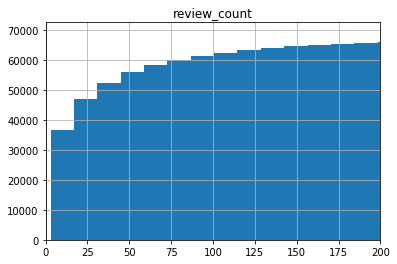

In [82]:
# rest['review_count'].plot(kind='bar')
fig=plt.figure()
rest.hist(column="review_count",bins=500,cumulative=True)
plt.xlim([0,200])
plt.show()

In [3]:
users = sqlContext.read.json(input_file_name3)

In [5]:
users = users.toPandas()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/Cellar/apache-spark/2.2.0/libexec/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 883, in send_command
    response = connection.send_command(command)
  File "/usr/local/Cellar/apache-spark/2.2.0/libexec/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1040, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
Py4JNetworkError: Error while receiving
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:54139)
Traceback (most recent call last):
  File "/usr/local/Cellar/apache-spark/2.2.0/libexec/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
  File "/Users/alvira/anaconda2/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 61] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:54139)

In [ ]:
# rest['review_count'].plot(kind='bar')
fig=plt.figure()
users.hist(column="review_count",bins=500,cumulative=True)
plt.xlim([0,100])
plt.show()

In [4]:
users

DataFrame[average_stars: double, compliment_cool: bigint, compliment_cute: bigint, compliment_funny: bigint, compliment_hot: bigint, compliment_list: bigint, compliment_more: bigint, compliment_note: bigint, compliment_photos: bigint, compliment_plain: bigint, compliment_profile: bigint, compliment_writer: bigint, cool: bigint, elite: array<bigint>, fans: bigint, friends: array<string>, funny: bigint, name: string, review_count: bigint, useful: bigint, user_id: string, yelping_since: string]